1. Bestimmung der Haupttreiber für Grundwasseränderungen
2. Dürre klassifizieren (Vorhersage)
    - Grundwasser Frühwarnen/Kritische Grundwasserstände
3. Grundwassenahme für nachhaltige Nutzung/Vorhersage der Grundwasserneubildungsraten
4. Verbesserte Lückenfüllung für Daten

### Dürre klassifizierung:
Fokussieren uns auf Hydrologische Dürre
SGI berechnung analog zum paper (Propat und Hartmann) (Analog zur Berechnung vom SSI im Paper)
Was wir machen können:
- Klassifizierung, ob ein Brunnen oder eine Region basierend auf aktuellen und vergangenen Bedingungen in naher Zukunft wahrscheinlich in eine Dürre eintreten wird (keine, milde, moderate, schwere, extreme)

Fragen:
- Welcher Zeitraum in die Zukunft ist angemessen
- Welche Region wäre gut für einen Fokus

https://pastas.readthedocs.io/v1.5.0/examples/standardized_groundwater_index.html

In [27]:
pip install pandas pyarrow matplotlib seaborn pastas

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pastas as ps # Import pastas

# Set some display options for pandas
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 1000)

# Set plot style
plt.style.use("seaborn-v0_8-whitegrid")

print(f"Pandas version: {pd.__version__}")
print(f"Pastas version: {ps.__version__}")

Pandas version: 2.2.3
Pastas version: 1.9.0


In [29]:
# --- Load Datasets ---
print("Loading datasets...")
try:
    attributes_df = pd.read_parquet("./Daten/grow_attributes.parquet")
    timeseries_df = pd.read_parquet("./Daten/grow_timeseries.parquet")
    print("Datasets loaded successfully.")
except Exception as e:
    print(f"Error loading datasets: {e}")
    print(
        "Please ensure 'grow_attributes.parquet' and"
        " 'grow_timeseries.parquet' are in the same directory as the"
        " notebook, or provide the correct path."
    )
    attributes_df = pd.DataFrame() # Create empty dataframes if loading fails
    timeseries_df = pd.DataFrame()

print("\n--- Attributes DataFrame ---")
if not attributes_df.empty:
    print("Shape:", attributes_df.shape)
    print("Info:")
    attributes_df.info()
    print("\nHead:")
    print(attributes_df.head())
    print("\nBasic Statistics (numerical):")
    print(attributes_df.describe())
    print("\nBasic Statistics (categorical):")
    print(attributes_df.describe(include=["object", "category", "bool"]))
else:
    print("Attributes DataFrame is empty or failed to load.")

print("\n--- Time Series DataFrame ---")
if not timeseries_df.empty:
    print("Shape:", timeseries_df.shape)
    print("Info:")
    timeseries_df.info(verbose=False) # Use verbose=False for large tables initially
    print("\nHead:")
    print(timeseries_df.head())
    print("\nBasic Statistics:")
    print(timeseries_df.describe())
    # Check data types of important columns
    print("\nData types for key timeseries columns:")
    if "GROW_ID" in timeseries_df.columns:
        print(f"GROW_ID: {timeseries_df['GROW_ID'].dtype}")
    if "date" in timeseries_df.columns: # Changed from 'time' to 'date'
        print(f"date: {timeseries_df['date'].dtype}")
    if "groundwater_depth_from_ground_m" in timeseries_df.columns:
        print(
            "groundwater_depth_from_ground_m:"
            f" {timeseries_df['groundwater_depth_from_ground_m'].dtype}"
        )
else:
    print("Time Series DataFrame is empty or failed to load.")

Loading datasets...
Datasets loaded successfully.

--- Attributes DataFrame ---
Shape: (187317, 50)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187317 entries, 0 to 187316
Data columns (total 50 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   GROW_ID                                       187317 non-null  object 
 1   original_ID_groundwater                       187317 non-null  object 
 2   name                                          187317 non-null  object 
 3   feature_type                                  187317 non-null  object 
 4   purpose                                       173571 non-null  object 
 5   status                                        161480 non-null  object 
 6   description                                   33670 non-null   object 
 7   latitude                                      187317 non-null  float64
 8   longitude         

In [30]:
if not attributes_df.empty:
    print("\n--- Detailed Exploration of Attributes Table ---")

    # Check for missing values
    print("\nMissing values per column (Top 20 with most missing):")
    missing_summary = attributes_df.isnull().sum()
    print(missing_summary[missing_summary > 0].sort_values(ascending=False).head(20))


    # Value counts for key categorical columns
    # Added 'koeppen_geiger_class' and 'rock_type_class' based on your output and slides
    key_categorical_cols = [
        "country",
        "interval",
        "trend_direction",
        "feature_type",
        "purpose",
        "status",
        "aquifer_name",
        "reference_point",
        "koeppen_geiger_class",
        "hydrobelt_class",
        "rock_type_class",
        "aquifer_type_class",
        "main_landuse",
        "groundwater_dependent_ecosystems_class"
    ]
    for col in key_categorical_cols:
        if col in attributes_df.columns:
            print(f"\nValue counts for '{col}' (Top 5):")
            print(attributes_df[col].value_counts(dropna=False).head(5))

    # Distribution of important numerical columns (Plot was already generated by you)
    # We can list them here for completeness if needed for re-running
    key_numerical_cols_for_plotting = [
        "length_years",
        "groundwater_mean_m",
        "groundwater_median_m",
        "gap_fraction",
        "latitude",
        "longitude",
        "ground_elevation_m_asl", # from attributes_df, not surface_elevation
        "rock_permeability_m2",
        "trend_slope_m_year-1" # Added this as it's interesting
    ]
    
    # The plotting code from the previous response for these columns can be re-used here.
    # Since you provided the plot, I'll skip re-printing the plotting code itself
    # to save space, but it would normally go here.
    print("\nNumerical attribute distributions were plotted previously (as per your image).")


    # Number of unique sites
    if "GROW_ID" in attributes_df.columns:
        print(
            f"\nNumber of unique sites in attributes table (based on GROW_ID):"
            f" {attributes_df['GROW_ID'].nunique()}"
        )
    else:
        print("\n'GROW_ID' column not found in attributes_df.")

else:
    print("Skipping attributes_df exploration as it's empty.")


--- Detailed Exploration of Attributes Table ---

Missing values per column (Top 20 with most missing):
top_of_well_elevation_m_asl        183107
aquifer_name                       175890
drilling_total_depth_m             175743
confinement                        175223
manager                            174914
address                            174830
description                        153647
surface_elevation_m_asl            150811
license                            128642
aggregated_from_n_values_median    116530
trend_slope_m_year-1               115879
soil_texture_30-200_cm_class        67053
status                              25837
hydrobelt_class                     18366
groundwaterscapes_ID_class          13857
purpose                             13746
rock_type_class                      6733
aquifer_type_class                   5712
drainage_density_m-1                  949
main_landuse                          613
dtype: int64

Value counts for 'country' (Top 5):
count


--- Detailed Exploration of Time Series Table ---

Converting 'date' column to datetime...
'date' column converted to datetime.

Missing values in 'groundwater_depth_from_ground_m': 3504468
Percentage missing: 10.34%


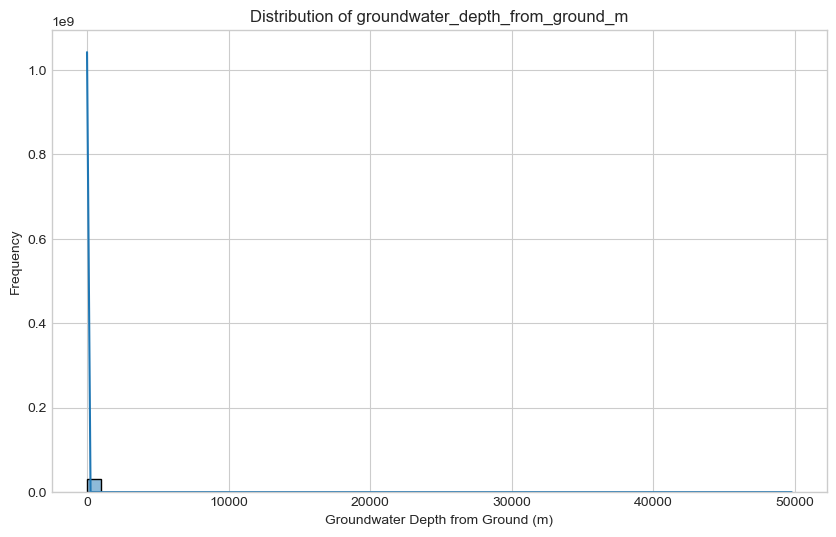


Overall time range of measurements:
Min date: 1838-10-01 00:00:00
Max date: 2024-04-23 00:00:00

Number of unique sites in time series table (based on GROW_ID): 187317
Number of unique GROW_IDs matches between attributes and time series tables.


In [31]:
if not timeseries_df.empty:
    print("\n--- Detailed Exploration of Time Series Table ---")

    # Ensure 'date' column is datetime
    if "date" in timeseries_df.columns and not pd.api.types.is_datetime64_any_dtype(
        timeseries_df["date"]
    ):
        print("\nConverting 'date' column to datetime...")
        try:
            timeseries_df["date"] = pd.to_datetime(timeseries_df["date"])
            print("'date' column converted to datetime.")
        except Exception as e:
            print(f"Error converting 'date' to datetime: {e}")

    # Check for missing values in the 'groundwater_depth_from_ground_m' column
    gw_value_col = "groundwater_depth_from_ground_m"
    if gw_value_col in timeseries_df.columns:
        missing_gw_values = timeseries_df[gw_value_col].isnull().sum()
        print(f"\nMissing values in '{gw_value_col}': {missing_gw_values}")
        if len(timeseries_df) > 0:
            print(
                "Percentage missing:"
                f" {missing_gw_values * 100 / len(timeseries_df):.2f}%"
            )
        else:
            print("Cannot calculate percentage missing, DataFrame is empty.")


        # Distribution of the 'groundwater_depth_from_ground_m' column
        plt.figure(figsize=(10, 6))
        sns.histplot(
            timeseries_df[gw_value_col].dropna(), kde=True, bins=50
        )
        plt.title(f"Distribution of {gw_value_col}")
        plt.xlabel("Groundwater Depth from Ground (m)")
        plt.ylabel("Frequency")
        # Consider log scale if highly skewed
        # plt.yscale('log')
        plt.show()

    # Time range of the data
    if "date" in timeseries_df.columns and pd.api.types.is_datetime64_any_dtype(
        timeseries_df["date"]
    ):
        print(f"\nOverall time range of measurements:")
        print(f"Min date: {timeseries_df['date'].min()}")
        print(f"Max date: {timeseries_df['date'].max()}")

    # Number of unique sites
    if "GROW_ID" in timeseries_df.columns:
        num_unique_sites_ts = timeseries_df["GROW_ID"].nunique()
        print(
            "\nNumber of unique sites in time series table (based on GROW_ID):"
            f" {num_unique_sites_ts}"
        )
        if not attributes_df.empty and "GROW_ID" in attributes_df.columns:
            if num_unique_sites_ts == attributes_df["GROW_ID"].nunique():
                print(
                    "Number of unique GROW_IDs matches between attributes and"
                    " time series tables."
                )
            else:
                print(
                    "Warning: Number of unique GROW_IDs MISMATCHES between"
                    " tables!"
                )
                print(f"  Attributes GROW_IDs: {attributes_df['GROW_ID'].nunique()}")
                print(f"  Time Series GROW_IDs: {num_unique_sites_ts}")
    else:
        print("\n'GROW_ID' column not found in timeseries_df.")

else:
    print("Skipping timeseries_df exploration as it's empty.")


--- Merging Data and Plotting Examples ---

Selected example_ids for plotting: ['GROW-67708906497', 'GROW-67610343315']


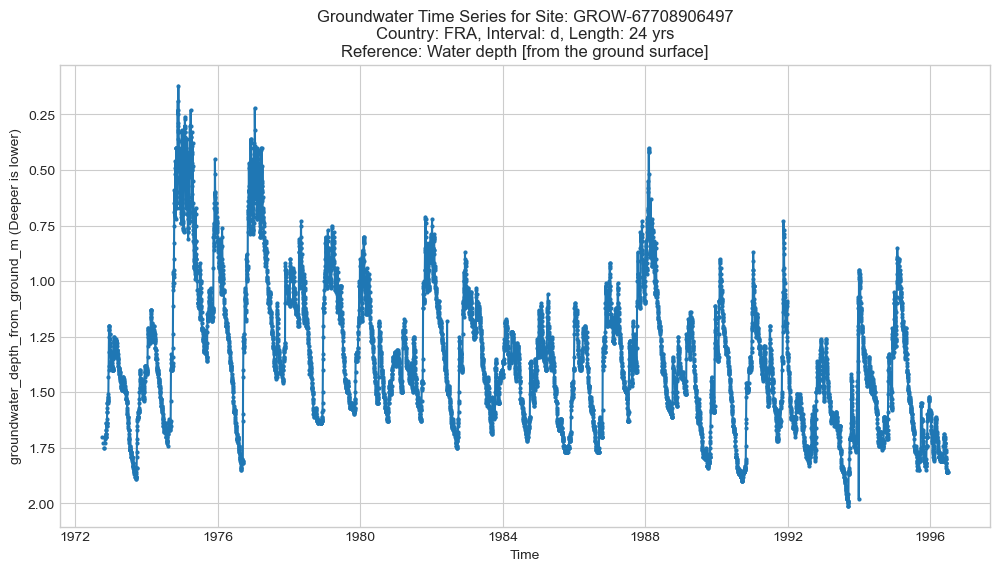

All 'groundwater_depth_from_ground_m' values are null for GROW_ID: GROW-67610343315


In [32]:
if not attributes_df.empty and not timeseries_df.empty and "GROW_ID" in attributes_df.columns and "GROW_ID" in timeseries_df.columns:
    print("\n--- Merging Data and Plotting Examples ---")

    # Select only necessary columns from attributes_df for merging
    attrs_to_merge = attributes_df[[
        "GROW_ID", "country", "interval", "length_years", "latitude", "longitude", "reference_point"
    ]].copy()

    # Merge dataframes using GROW_ID
    # An inner merge might significantly reduce the size of timeseries_df if many GROW_IDs don't have attributes
    # For initial exploration, a left merge on timeseries_df might be better to see all time series
    # but for analysis where attributes are needed, inner is fine.
    # Let's stick to inner as per original logic to ensure attributes are present.
    
    # To avoid issues with plotting if timeseries_df is huge,
    # let's first select example IDs, then merge only for those.

    example_ids = []
    if "GROW_ID" in attributes_df.columns and "interval" in attributes_df.columns and "length_years" in attributes_df.columns:
        # Prefer sites with longer records and monthly/daily data for SGI demo
        candidate_sites_df = attributes_df[
            (attributes_df["length_years"] >= 10) & # At least 10 years
            (attributes_df["interval"].isin(["MS", "d"]))
        ]

        if not candidate_sites_df.empty:
            # Try to get one daily and one monthly if available
            daily_sites = candidate_sites_df[candidate_sites_df["interval"] == "d"]
            monthly_sites = candidate_sites_df[candidate_sites_df["interval"] == "MS"]

            if not daily_sites.empty:
                example_ids.append(daily_sites["GROW_ID"].iloc[0])
            if not monthly_sites.empty and (not example_ids or monthly_sites["GROW_ID"].iloc[0] not in example_ids) :
                example_ids.append(monthly_sites["GROW_ID"].iloc[0])
            
            # If still not enough, take any other candidates
            if len(example_ids) < 2 and len(candidate_sites_df) > len(example_ids):
                remaining_candidates = candidate_sites_df[~candidate_sites_df["GROW_ID"].isin(example_ids)]
                if not remaining_candidates.empty:
                    example_ids.extend(remaining_candidates["GROW_ID"].sample(min(2-len(example_ids), len(remaining_candidates))).tolist())
        
        # Fallback if no ideal candidates found
        if not example_ids and not attributes_df.empty:
            print("No ideal (long record, MS/d) sites found, selecting random sites.")
            example_ids = attributes_df.sample(min(2, len(attributes_df)))["GROW_ID"].tolist()
        
        print(f"\nSelected example_ids for plotting: {example_ids}")

        gw_value_col = "groundwater_depth_from_ground_m" # Primary value column

        for site_id in example_ids:
            site_attr = attributes_df[attributes_df["GROW_ID"] == site_id].iloc[0]
            site_data_ts = timeseries_df[timeseries_df["GROW_ID"] == site_id].copy()

            if site_data_ts.empty:
                print(f"No time series data for GROW_ID: {site_id}")
                continue
            
            if gw_value_col not in site_data_ts.columns:
                print(f"'{gw_value_col}' not found for GROW_ID: {site_id}")
                continue
            if site_data_ts[gw_value_col].isnull().all():
                print(f"All '{gw_value_col}' values are null for GROW_ID: {site_id}")
                continue


            # Ensure 'date' is datetime and set as index for plotting
            if "date" not in site_data_ts.columns:
                print(f"'date' column missing for GROW_ID: {site_id}")
                continue
            if not pd.api.types.is_datetime64_any_dtype(site_data_ts["date"]):
                site_data_ts["date"] = pd.to_datetime(site_data_ts["date"])
            
            site_data_ts = site_data_ts.set_index("date").sort_index()

            plt.figure(figsize=(12, 6))
            plt.plot(site_data_ts.index, site_data_ts[gw_value_col], marker=".", linestyle="-", markersize=4)
            plt.title(
                f"Groundwater Time Series for Site: {site_id}\n"
                f"Country: {site_attr.get('country', 'N/A')}, Interval:"
                f" {site_attr.get('interval', 'N/A')}, Length: {site_attr.get('length_years', 'N/A')} yrs\n"
                f"Reference: {site_attr.get('reference_point', 'N/A')}"
            )
            plt.xlabel("Time")
            plt.ylabel(gw_value_col)
            if "Water depth" in site_attr.get('reference_point', ''):
                 plt.gca().invert_yaxis() # Invert y-axis for depth data (deeper is lower on plot)
                 plt.ylabel(f"{gw_value_col} (Deeper is lower)")
            plt.show()
    else:
        print("Cannot select example IDs. Check 'GROW_ID', 'interval', 'length_years' in attributes_df.")
else:
    print(
        "Skipping merge and plotting as one or both DataFrames are empty or"
        " 'GROW_ID' is missing."
    )

In [33]:
print("\n--- Considerations for SGI Analysis ---")
print(
    "The Standardized Groundwater Index (SGI) is analogous to SPI/SSI."
    " Key steps involve:"
)
gw_value_col = "groundwater_depth_from_ground_m"
print(f"Primary measurement for SGI: '{gw_value_col}'")
print(
    "Remember: For depth data, larger values mean deeper groundwater (drier"
    " conditions)."
)

print(
    "\n1. Data Preparation & Filtering:"
)
print(
    "   - Select sites with sufficient `length_years` and low `gap_fraction`."
)
print(
    "   - Handle different `interval` types:"
)
print(
    "     - 'MS' (Monthly Start): Ideal for SGI. Data can be used directly."
)
print(
    "     - 'd' (Daily): Aggregate to monthly (e.g., monthly mean of"
    f" `{gw_value_col}`)."
)
print(
    "     - 'YS' (Yearly Start): Most common in this dataset. Standard monthly SGI"
    " cannot be directly calculated. Options:"
)
print(
    "       - Calculate an Annual SGI (ASGI) by fitting distributions to annual"
    " values."
)
print(
    "       - Exclude these sites if monthly SGI is strictly required."
)
print(
    "       - Advanced: Attempt to disaggregate or model monthly values (complex)."
)
print(
    "   - Handle missing values in the monthly series (interpolation for small"
    " gaps, or use Pastas for simulation if gaps are large)."
)


print(
    "\n2. Distribution Fitting (Core of Popat & Hartmann's work):"
)
print(
    "   - For each calendar month (e.g., all Januarys, all Februarys, etc.) of the"
    " (monthly) groundwater depth data:"
)
print(
    "   - Fit a probability distribution. Since depth data is non-negative and can"
    " be skewed, distributions like Gamma, Log-Normal, Weibull, GEV are good"
    " candidates. Normal might not always be appropriate."
)
print(
    "   - Use goodness-of-fit tests (Kolmogorov-Smirnov, Anderson-Darling) and"
    " information criteria (AIC, BIC) to select the best-fitting parametric CDF."
)

print(
    "\n3. Transformation to SGI:"
)
print(
    "   - Calculate the non-exceedance probability of each monthly value using its"
    " corresponding fitted CDF."
)
print(
    "   - Transform this probability to a standard normal variate (Z-score). This"
    " Z-score is the SGI value."
)
print(
    "   - For depth data (where higher value = drier), you might need to adjust"
    " the interpretation or the probability calculation (e.g., P(X >= x) for"
    " dryness if using exceedance, or ensure CDF P(X <= x) is used consistently"
    " and interpret Z-scores accordingly. Standard practice is to use P(X <= x)"
    " and then negative Z-scores indicate dryness)."
)


print(
    "\n4. Drought Classification:"
)
print(
    "   - Define SGI thresholds (e.g., Mild: 0 to -0.99, Moderate: -1.00 to"
    " -1.49, etc.)."
)

print(
    "\n5. Using Pastas:"
)
print(
    "   - Pastas can model the `{gw_value_col}` time series."
)
print(
    "   - SGI can be calculated on observed data, or on Pastas model components."
)
print(
    "   - The Earth System Variables in `timeseries_df` (precipitation, ET, NDVI,"
    " land use) can serve as explanatory variables (stresses) in Pastas models."
)

# Example: How to select data for a single site and prepare for SGI (conceptual)
if not timeseries_df.empty and "GROW_ID" in timeseries_df.columns and "date" in timeseries_df.columns and gw_value_col in timeseries_df.columns:
    if example_ids: # Use one of the previously selected example_ids
        target_site_id = example_ids[0] # Pick the first one for demo
        site_attr_row = attributes_df[attributes_df["GROW_ID"] == target_site_id]
        
        if not site_attr_row.empty:
            site_interval = site_attr_row["interval"].iloc[0]
            print(f"\nConceptual SGI prep for site: {target_site_id}, Interval: {site_interval}")

            single_site_data = timeseries_df[
                timeseries_df["GROW_ID"] == target_site_id
            ][["date", gw_value_col]].copy()
            
            if not pd.api.types.is_datetime64_any_dtype(single_site_data["date"]):
                single_site_data["date"] = pd.to_datetime(single_site_data["date"])
            
            single_site_data = single_site_data.set_index("date").sort_index().dropna(subset=[gw_value_col])


            monthly_data_for_sgi = pd.Series(dtype=float)
            if site_interval == 'd': # Daily
                print(f"Resampling daily data to monthly mean for SGI using '{gw_value_col}'...")
                monthly_data_for_sgi = single_site_data[gw_value_col].resample("MS").mean()
            elif site_interval == 'MS': # Monthly
                print(f"Data is already monthly. Using '{gw_value_col}'.")
                monthly_data_for_sgi = single_site_data[gw_value_col]
            elif site_interval == 'YS': # Yearly
                print(
                    f"Data is yearly for '{gw_value_col}'. Standard monthly SGI is not directly applicable."
                    " Consider Annual SGI or alternative approaches."
                )
            else:
                print(f"Interval {site_interval} for '{gw_value_col}' not directly handled for monthly SGI.")

            if not monthly_data_for_sgi.empty:
                print("\nFirst 5 monthly values for SGI calculation:")
                print(monthly_data_for_sgi.head())
                
                if len(monthly_data_for_sgi) > 0:
                    january_values = monthly_data_for_sgi[monthly_data_for_sgi.index.month == 1]
                    print(f"\nNumber of January values: {len(january_values)}")
                    if not january_values.empty:
                         print(january_values.head())
                    else:
                        print("No January values found in the resampled/selected data for this site.")
                else:
                    print("Monthly data series is empty after processing.")
            else:
                print("No monthly data generated for SGI example for this site.")
        else:
            print(f"Attributes not found for example site: {target_site_id}")
    else:
        print("No example_ids available to demonstrate SGI prep.")
else:
    print(
        "Skipping SGI conceptual prep as timeseries_df is empty or key columns"
        " are missing."
    )


--- Considerations for SGI Analysis ---
The Standardized Groundwater Index (SGI) is analogous to SPI/SSI. Key steps involve:
Primary measurement for SGI: 'groundwater_depth_from_ground_m'
Remember: For depth data, larger values mean deeper groundwater (drier conditions).

1. Data Preparation & Filtering:
   - Select sites with sufficient `length_years` and low `gap_fraction`.
   - Handle different `interval` types:
     - 'MS' (Monthly Start): Ideal for SGI. Data can be used directly.
     - 'd' (Daily): Aggregate to monthly (e.g., monthly mean of `groundwater_depth_from_ground_m`).
     - 'YS' (Yearly Start): Most common in this dataset. Standard monthly SGI cannot be directly calculated. Options:
       - Calculate an Annual SGI (ASGI) by fitting distributions to annual values.
       - Exclude these sites if monthly SGI is strictly required.
       - Advanced: Attempt to disaggregate or model monthly values (complex).
   - Handle missing values in the monthly series (interpolation 

In [36]:
if not attributes_df.empty:
    print("\n--- Identifying Suitable Countries for Monthly SGI ---")

    # Define SGI suitability criteria
    min_length_years_sgi = 20  # Minimum record length for SGI
    max_gap_fraction_sgi = 0.20 # Maximum allowed gap fraction (as per slide 28)
    suitable_intervals_sgi = ["MS", "d"] # Monthly or Daily

    # Apply filters
    sgi_suitable_sites_df = attributes_df[
        (attributes_df["interval"].isin(suitable_intervals_sgi)) &
        (attributes_df["length_years"] >= min_length_years_sgi) &
        (attributes_df["gap_fraction"] <= max_gap_fraction_sgi)
    ].copy() # Use .copy() to avoid SettingWithCopyWarning

    print(
        f"Total sites in attributes_df: {len(attributes_df)}"
    )
    print(
        f"Number of sites potentially suitable for monthly SGI (interval MS/d,"
        f" length >= {min_length_years_sgi} yrs, gap <= {max_gap_fraction_sgi*100}%):"
        f" {len(sgi_suitable_sites_df)}"
    )

    if not sgi_suitable_sites_df.empty:
        # Count suitable sites per country
        suitable_sites_by_country = (
            sgi_suitable_sites_df["country"]
            .value_counts()
            .reset_index()
        )
        suitable_sites_by_country.columns = ["country", "sgi_suitable_site_count"]

        print("\nTop countries by number of SGI-suitable sites:")
        print(suitable_sites_by_country.head(10))

        # Recommendation
        if not suitable_sites_by_country.empty:
            recommended_country = suitable_sites_by_country["country"].iloc[0]
            recommended_count = suitable_sites_by_country["sgi_suitable_site_count"].iloc[0]
            print(
                f"\nRecommendation: Start with '{recommended_country}' which has"
                f" {recommended_count} potentially suitable sites for monthly SGI."
            )
            
            # Further check: How many of these have 'MS' vs 'd'
            country_specific_sgi_sites = sgi_suitable_sites_df[sgi_suitable_sites_df['country'] == recommended_country]
            interval_counts_in_recommended = country_specific_sgi_sites['interval'].value_counts()
            print(f"\nInterval breakdown for SGI-suitable sites in {recommended_country}:")
            print(interval_counts_in_recommended)

        else:
            print(
                "\nNo countries found with SGI-suitable sites based on the"
                " criteria. You might need to relax the criteria (e.g., shorter"
                " length_years) or handle 'YS' data differently."
            )
    else:
        print(
            "\nNo sites found suitable for SGI based on the current criteria."
            " Consider adjusting min_length_years or how 'YS' data is handled."
        )
else:
    print("Attributes DataFrame is empty. Cannot select a region.")


--- Identifying Suitable Countries for Monthly SGI ---
Total sites in attributes_df: 187317
Number of sites potentially suitable for monthly SGI (interval MS/d, length >= 20 yrs, gap <= 20.0%): 3634

Top countries by number of SGI-suitable sites:
  country  sgi_suitable_site_count
0     FRA                      971
1     AUS                      939
2     USA                      560
3     CZE                      302
4     BEL                      289
5     CUB                      282
6     DEU                       77
7     PRT                       66
8     ESP                       65
9     GBR                       19

Recommendation: Start with 'FRA' which has 971 potentially suitable sites for monthly SGI.

Interval breakdown for SGI-suitable sites in FRA:
interval
MS    845
d     126
Name: count, dtype: int64


In [37]:
from scipy import stats

In [38]:
# --- Section 4: Filtering for Target Region (France) ---
print("\n--- Section 4: Filtering for Target Region (France) ---")

target_country = "FRA"
min_length_years_sgi = 20
max_gap_fraction_sgi = 0.20
suitable_intervals_sgi = ["MS", "d"]
gw_value_col = "groundwater_depth_from_ground_m" # Primary value column

if not attributes_df.empty:
    # Apply filters to get the GROW_IDs for suitable French sites
    france_sgi_suitable_attributes_df = attributes_df[
        (attributes_df["country"] == target_country) &
        (attributes_df["interval"].isin(suitable_intervals_sgi)) &
        (attributes_df["length_years"] >= min_length_years_sgi) &
        (attributes_df["gap_fraction"] <= max_gap_fraction_sgi)
    ].copy()

    num_france_suitable = len(france_sgi_suitable_attributes_df)
    print(
        f"\nNumber of SGI-suitable sites found in {target_country}:"
        f" {num_france_suitable}"
    )

    if num_france_suitable > 0:
        print(
            "\nAttributes of SGI-suitable sites in"
            f" {target_country} (Head):"
        )
        print(france_sgi_suitable_attributes_df.head())
        print("\nInterval breakdown for these sites:")
        print(france_sgi_suitable_attributes_df["interval"].value_counts())

        # Get the list of GROW_IDs for these sites
        france_sgi_grow_ids = france_sgi_suitable_attributes_df["GROW_ID"].unique()

        # Filter the main timeseries_df for these GROW_IDs and necessary columns
        if not timeseries_df.empty and "GROW_ID" in timeseries_df.columns:
            france_timeseries_df = timeseries_df[
                timeseries_df["GROW_ID"].isin(france_sgi_grow_ids)
            ][["GROW_ID", "date", gw_value_col]].copy() # Select only needed columns

            # Ensure 'date' is datetime
            if not pd.api.types.is_datetime64_any_dtype(france_timeseries_df["date"]):
                france_timeseries_df["date"] = pd.to_datetime(france_timeseries_df["date"])
            
            print(
                f"\nShape of filtered timeseries data for {target_country}:"
                f" {france_timeseries_df.shape}"
            )
            print(f"Number of unique GROW_IDs in filtered timeseries: {france_timeseries_df['GROW_ID'].nunique()}")

            # Check for missing values in the value column for the filtered data
            if gw_value_col in france_timeseries_df.columns:
                missing_in_france_ts = france_timeseries_df[gw_value_col].isnull().sum()
                if len(france_timeseries_df) > 0:
                    print(
                        f"Missing '{gw_value_col}' values in filtered French data:"
                        f" {missing_in_france_ts}"
                        f" ({missing_in_france_ts * 100 / len(france_timeseries_df):.2f}%)"
                    )
                else:
                     print(f"Missing '{gw_value_col}' values in filtered French data: {missing_in_france_ts}")
            else:
                print(f"'{gw_value_col}' not found in france_timeseries_df.")

        else:
            print(
                "Timeseries DataFrame is empty or 'GROW_ID' column is missing."
                " Cannot filter time series data."
            )
            france_timeseries_df = pd.DataFrame() # Ensure it exists for later checks
    else:
        print(f"No SGI-suitable sites found for {target_country} with current criteria.")
        france_sgi_suitable_attributes_df = pd.DataFrame()
        france_timeseries_df = pd.DataFrame()
else:
    print("Attributes DataFrame is empty. Cannot filter for France.")
    france_sgi_suitable_attributes_df = pd.DataFrame()
    france_timeseries_df = pd.DataFrame()


--- Section 4: Filtering for Target Region (France) ---

Number of SGI-suitable sites found in FRA: 971

Attributes of SGI-suitable sites in FRA (Head):
               GROW_ID original_ID_groundwater              name feature_type purpose status description   latitude  longitude  surface_elevation_m_asl  top_of_well_elevation_m_asl country address license aquifer_name confinement                              organisation manager  drilling_total_depth_m interval starting_date ending_date  length_years  autocorrelation  aggregated_from_n_values_median  gap_fraction  jumps  plateaus trend_direction  trend_slope_m_year-1                        reference_point  groundwater_mean_m  groundwater_median_m koeppen_geiger_class hydrobelt_class  ground_elevation_m_asl  topographic_slope_degrees              rock_type_class aquifer_type_class  rock_permeability_m2  rock_porosity_fraction soil_texture_0-30_cm_class soil_texture_30-200_cm_class  soil_saturated_conductivity_0-30_cm_cm_d-1  soil_satur


--- Section 5: Preprocessing Time Series Data for SGI ---

Processed 971 sites into monthly time series for SGI.

Example processed monthly series for GROW_ID: GROW-67708906497 (Head):
date
1972-10-01    1.728333
1972-11-01    1.632667
1972-12-01    1.320645
1973-01-01    1.357742
1973-02-01    1.292857
Freq: MS, Name: groundwater_depth_from_ground_m, dtype: float64


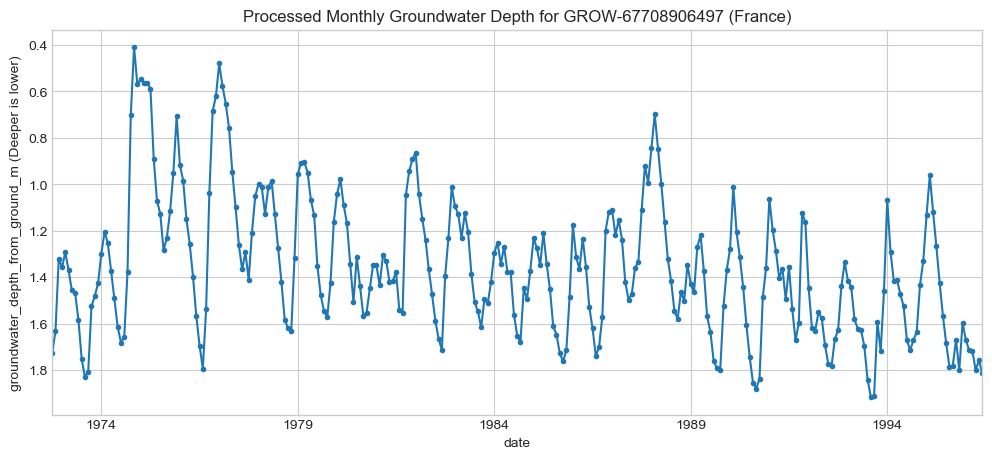

In [39]:
# --- Section 5: Preprocessing Time Series Data for SGI ---
print("\n--- Section 5: Preprocessing Time Series Data for SGI ---")

all_monthly_data_dict = {} # To store processed monthly series for each site

if not france_timeseries_df.empty and not france_sgi_suitable_attributes_df.empty:
    processed_sites_count = 0
    for grow_id in france_sgi_grow_ids:
        site_attr = france_sgi_suitable_attributes_df[
            france_sgi_suitable_attributes_df["GROW_ID"] == grow_id
        ].iloc[0]
        site_interval = site_attr["interval"]

        site_ts = france_timeseries_df[
            france_timeseries_df["GROW_ID"] == grow_id
        ].copy()
        
        if site_ts.empty or site_ts[gw_value_col].isnull().all():
            # print(f"Skipping {grow_id}: No data or all values are null.")
            continue

        site_ts = site_ts.set_index("date").sort_index()
        
        monthly_series = pd.Series(dtype=float)
        if site_interval == "MS": # Already monthly
            monthly_series = site_ts[gw_value_col]
        elif site_interval == "d": # Daily, resample to monthly mean
            monthly_series = site_ts[gw_value_col].resample("MS").mean()
        
        # Drop NaN values that might result from resampling or were already there
        monthly_series = monthly_series.dropna()

        if len(monthly_series) >= min_length_years_sgi * 12 * 0.5: # Ensure enough data after processing (e.g. 50% of expected)
            all_monthly_data_dict[grow_id] = monthly_series
            processed_sites_count += 1
        # else:
            # print(f"Skipping {grow_id}: Not enough monthly data points after processing (has {len(monthly_series)}).")


    print(
        f"\nProcessed {processed_sites_count} sites into monthly time series for SGI."
    )
    if processed_sites_count > 0:
        # Example of one processed series
        example_id_processed = list(all_monthly_data_dict.keys())[0]
        print(f"\nExample processed monthly series for GROW_ID: {example_id_processed} (Head):")
        print(all_monthly_data_dict[example_id_processed].head())
        
        # Plot one example to verify resampling
        plt.figure(figsize=(12,5))
        all_monthly_data_dict[example_id_processed].plot(marker='o', ms=3)
        plt.title(f"Processed Monthly Groundwater Depth for {example_id_processed} (France)")
        plt.ylabel(gw_value_col)
        if "depth" in gw_value_col.lower(): # Check if it's depth data
            plt.gca().invert_yaxis()
            plt.ylabel(f"{gw_value_col} (Deeper is lower)")
        plt.show()
else:
    print("Filtered French data is not available for preprocessing.")


--- Section 6: SGI Calculation Methodology ---

Calculating SGI for 971 French sites...
  Processing site 50/971: GROW-67740630976
  Processing site 100/971: GROW-67760887046
  Processing site 150/971: GROW-67872892112
  Processing site 200/971: GROW-68076411251
  Processing site 250/971: GROW-68192542483
  Processing site 300/971: GROW-68236375936
  Processing site 350/971: GROW-68273796444
  Processing site 400/971: GROW-68336984591
  Processing site 450/971: GROW-68499459433
  Processing site 500/971: GROW-68833932683
  Processing site 550/971: GROW-69236919987
  Processing site 600/971: GROW-69245700358
  Processing site 650/971: GROW-69254722810
  Processing site 700/971: GROW-69264825019
  Processing site 750/971: GROW-69275971126
  Processing site 800/971: GROW-69285816684
  Processing site 850/971: GROW-69295053978
  Processing site 900/971: GROW-69310220393
  Processing site 950/971: GROW-69320536554

SGI calculated for 971 sites.

Example SGI series for GROW_ID: GROW-6770890

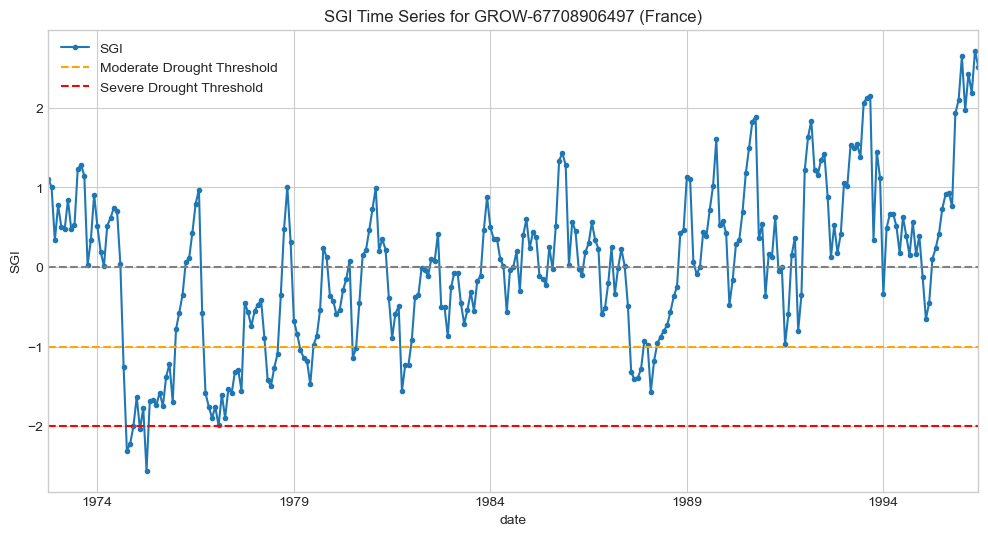

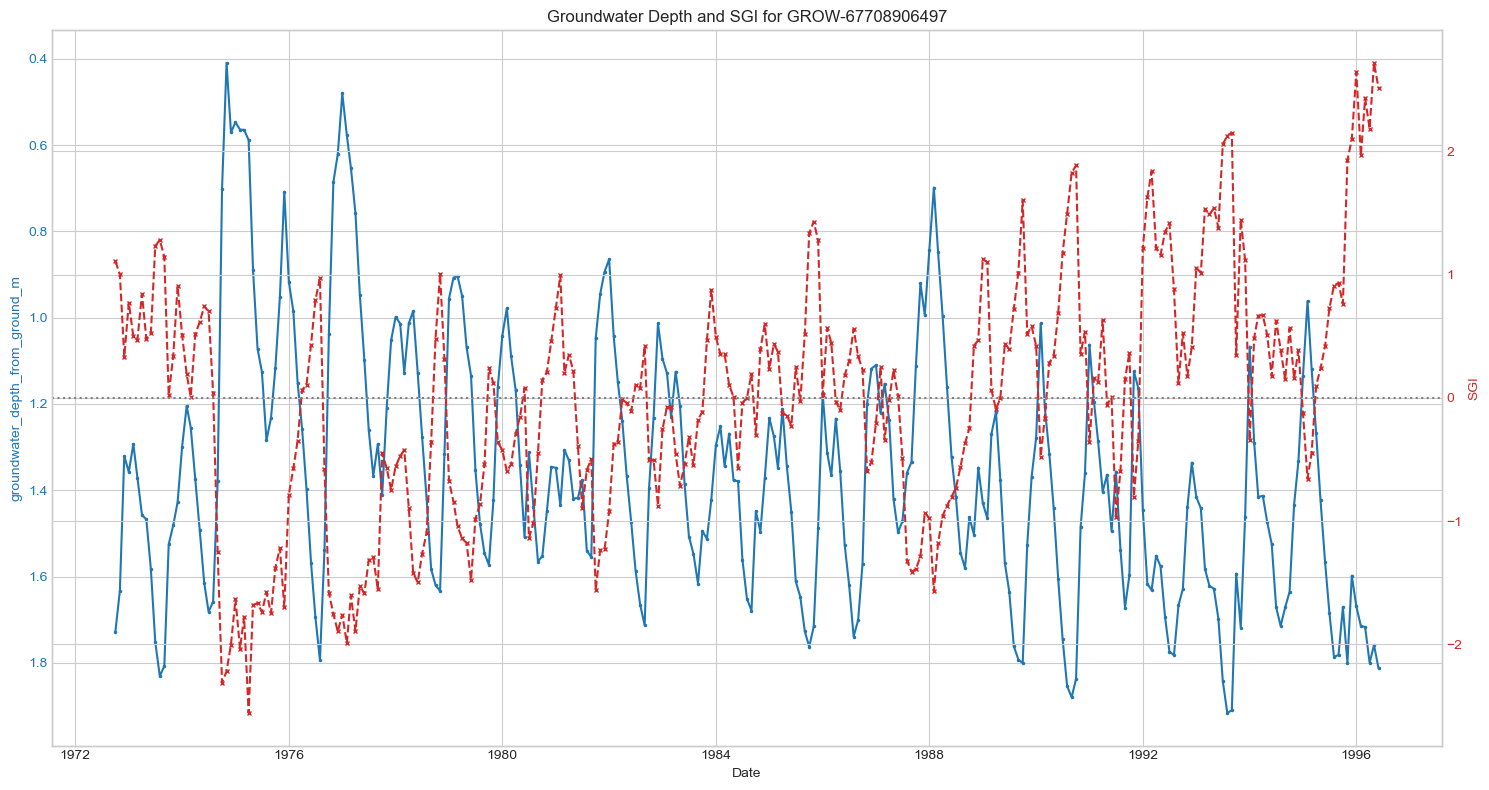

In [40]:
# --- Section 6: SGI Calculation Methodology ---
print("\n--- Section 6: SGI Calculation Methodology ---")

# List of distributions to try (from scipy.stats)
# Consider distributions suitable for non-negative, potentially skewed data
# Gamma, Log-Normal, Weibull, Generalized Extreme Value (GEV) are common.
# Normal is often used as a baseline but might not be best for hydrological data.
DISTRIBUTIONS_TO_TRY = [
    stats.gamma, stats.lognorm, stats.genextreme, stats.pearson3,
    stats.weibull_min, stats.weibull_max, # Weibull can be min or max
    stats.norm, stats.gumbel_r, stats.gumbel_l
]
# Note: Some distributions might require specific parameter constraints or fail to fit.

def calculate_sgi_for_series(monthly_series, distributions=DISTRIBUTIONS_TO_TRY):
    """
    Calculates SGI for a single monthly time series.
    
    Args:
        monthly_series (pd.Series): Monthly groundwater depth data, index is datetime.
        distributions (list): List of scipy.stats distribution objects to try.
        
    Returns:
        pd.Series: SGI values, index is datetime. Or None if calculation fails.
    """
    if monthly_series.empty or monthly_series.isnull().all():
        return None
    if len(monthly_series.dropna()) < min_length_years_sgi * 0.8 * 12 : # Need enough data for reliable monthly stats (e.g. 80% of min_length)
        # print(f"Warning: Series has only {len(monthly_series.dropna())} non-NaN values. SGI might be unreliable.")
        # Allow to proceed but be cautious with interpretation for very short series.
        pass


    sgi_values = pd.Series(index=monthly_series.index, dtype=float, name="SGI")

    for month_num in range(1, 13):
        month_data = monthly_series[monthly_series.index.month == month_num].dropna()
        
        if len(month_data) < 10: # Need at least 10 data points for a given month to fit
            # print(f"Skipping month {month_num}: Only {len(month_data)} data points.")
            continue

        best_dist = None
        best_params = None
        min_aic = np.inf

        for distribution in distributions:
            try:
                # Fit distribution
                params = distribution.fit(month_data)
                
                # Calculate Log-Likelihood and AIC
                # For AIC, K is number of parameters
                ll = np.sum(distribution.logpdf(month_data, *params))
                k = len(params)
                aic = 2 * k - 2 * ll
                
                if aic < min_aic:
                    min_aic = aic
                    best_dist = distribution
                    best_params = params
            except Exception as e:
                # print(f"Could not fit {distribution.name} for month {month_num}: {e}")
                continue
        
        if best_dist is None:
            # print(f"Could not find a suitable distribution for month {month_num}.")
            continue

        # Calculate non-exceedance probability using the best-fit distribution's CDF
        # For depth data: F(x) = P(Depth <= x).
        # A small depth (wet) will have a small F(x).
        # A large depth (dry) will have a large F(x).
        prob_non_exceedance = best_dist.cdf(month_data, *best_params)
        
        # Clip probabilities to avoid issues with norm.ppf at 0 or 1
        prob_non_exceedance = np.clip(prob_non_exceedance, 1e-6, 1 - 1e-6)

        # Transform to SGI (Z-score)
        # Standard SGI: negative = dry.
        # If using depth, where high depth = dry:
        #   - norm.ppf(prob_non_exceedance) gives:
        #       - negative Z for shallow depths (wet)
        #       - positive Z for deep depths (dry)
        #   - To align with "negative SGI = dry", we need to invert this.
        #     SGI = - (norm.ppf(prob_non_exceedance))
        #     OR, more directly, use the probability of *exceedance* for dryness:
        #     SGI = norm.ppf(1 - prob_non_exceedance)
        # Let's use the latter for clarity with depth data.
        
        # However, the most common convention for SPI/SSI/SGI is that
        # the index is derived from the CDF P(X <= x), and then negative values
        # of the index represent drought.
        # If X is depth, then a low depth (wet) gives a low P(X<=x) and thus a negative SGI.
        # A high depth (dry) gives a high P(X<=x) and thus a positive SGI.
        # This means positive SGI = dry, negative SGI = wet.
        # To get negative SGI = dry: SGI_val = -stats.norm.ppf(prob_non_exceedance)
        # OR SGI_val = stats.norm.ppf(1 - prob_non_exceedance)
        # Let's stick to the direct interpretation:
        # SGI = Z-score of the non-exceedance probability.
        # We will interpret the resulting SGI: negative SGI = shallower than normal (wetter), positive SGI = deeper than normal (drier).
        # If you want the standard "negative SGI = dry", then for depth data, you must invert.
        # For this implementation, let's calculate raw Z from CDF and then decide on inversion at interpretation/classification.
        # OR, to be consistent with Popat & Hartmann's likely approach for streamflow (low flow = dry = negative SSI):
        # If we want high depth (dry) to be negative SGI:
        # We need the probability of being *at least this dry* or *shallower*.
        # Let's use the standard definition: SGI = norm.ppf(P(X<=x)).
        # For depth, this means:
        #   - Low depth (wet) -> low P(X<=x) -> negative SGI.
        #   - High depth (dry) -> high P(X<=x) -> positive SGI.
        # This is fine, as long as we are consistent in interpretation.
        # "Positive SGI means drier (deeper) than normal for this month."
        # "Negative SGI means wetter (shallower) than normal for this month."
        
        # Let's follow the convention that negative SGI means drought.
        # For depth data, a drought is a *high* depth.
        # So, we want the probability of being *less than or equal to* a certain depth.
        # If depth_drought is a high value, P(Depth <= depth_drought) will be high.
        # norm.ppf(high_probability) is positive.
        # To make it negative for drought, we use: SGI = - norm.ppf(P(Depth <= depth_drought))
        # OR, equivalently, SGI = norm.ppf(1 - P(Depth <= depth_drought))
        # Let's use the latter as it's more direct for "probability of being drier or equally dry"
        # if we consider 1-CDF as the "exceedance" related to dryness.
        # No, this is confusing. Standard SPI/SSI:
        # 1. Fit CDF F(x) = P(X <= x)
        # 2. SGI = norm.ppf(F(x))
        # If X is precipitation/streamflow: low X -> low F(x) -> negative SGI (drought)
        # If X is groundwater_DEPTH: low X (shallow) -> low F(x) -> negative SGI (wet)
        #                             high X (deep)   -> high F(x) -> positive SGI (drought)
        # So, for depth, a POSITIVE SGI means drought.
        # If we want to stick to "negative SGI means drought", we must transform.
        # Simplest: SGI_raw = norm.ppf(prob_non_exceedance). Then SGI_for_drought_classification = SGI_raw * (-1 if interpreting high depth as drought)
        # For now, let's calculate SGI_raw.
        
        sgi_month_values = stats.norm.ppf(prob_non_exceedance)
        sgi_values.loc[month_data.index] = sgi_month_values
        
    return sgi_values.sort_index()


# --- Apply SGI Calculation to French Sites ---
sgi_results_dict = {}
sites_with_sgi_count = 0

if all_monthly_data_dict:
    print(f"\nCalculating SGI for {len(all_monthly_data_dict)} French sites...")
    for i, (grow_id, monthly_ts) in enumerate(all_monthly_data_dict.items()):
        if (i + 1) % 50 == 0: # Print progress
            print(f"  Processing site {i+1}/{len(all_monthly_data_dict)}: {grow_id}")
        
        sgi_series = calculate_sgi_for_series(monthly_ts)
        if sgi_series is not None and not sgi_series.empty:
            sgi_results_dict[grow_id] = sgi_series
            sites_with_sgi_count += 1
    print(f"\nSGI calculated for {sites_with_sgi_count} sites.")

    if sgi_results_dict:
        # Example of one SGI series
        example_sgi_id = list(sgi_results_dict.keys())[0]
        print(f"\nExample SGI series for GROW_ID: {example_sgi_id} (Head):")
        print(sgi_results_dict[example_sgi_id].head())

        plt.figure(figsize=(12, 6))
        sgi_results_dict[example_sgi_id].plot(marker='o', ms=3, linestyle='-')
        plt.title(f"SGI Time Series for {example_sgi_id} (France)")
        plt.ylabel("SGI")
        plt.axhline(0, color='grey', linestyle='--')
        plt.axhline(-1, color='orange', linestyle='--', label="Moderate Drought Threshold") # Example
        plt.axhline(-2, color='red', linestyle='--', label="Severe Drought Threshold")    # Example
        plt.legend()
        plt.show()
        
        # Plot original data and SGI together for one site
        plt.figure(figsize=(15, 8))
        ax1 = plt.gca()
        color1 = 'tab:blue'
        ax1.set_xlabel('Date')
        ax1.set_ylabel(gw_value_col, color=color1)
        ax1.plot(all_monthly_data_dict[example_sgi_id].index, all_monthly_data_dict[example_sgi_id].values, color=color1, marker='.', ms=3, linestyle='-')
        ax1.tick_params(axis='y', labelcolor=color1)
        if "depth" in gw_value_col.lower():
            ax1.invert_yaxis()

        ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
        color2 = 'tab:red'
        ax2.set_ylabel('SGI', color=color2)
        ax2.plot(sgi_results_dict[example_sgi_id].index, sgi_results_dict[example_sgi_id].values, color=color2, marker='x', ms=3, linestyle='--')
        ax2.tick_params(axis='y', labelcolor=color2)
        ax2.axhline(0, color='grey', linestyle=':')
        
        plt.title(f"Groundwater Depth and SGI for {example_sgi_id}")
        plt.tight_layout() # otherwise the right y-label is slightly clipped
        plt.show()

else:
    print("No processed monthly data available to calculate SGI.")

In [41]:
# --- Section 7: Drought Classification and Analysis ---
print("\n--- Section 7: Drought Classification and Analysis ---")

# SGI Drought Categories (Example - adjust as needed)
# For groundwater_depth_from_ground_m, POSITIVE SGI means drier (deeper).
# If you want "negative SGI = drought", you need to invert the SGI values or the thresholds.
# Let's assume for now: Positive SGI = Deeper/Drier, Negative SGI = Shallower/Wetter

# Option 1: Interpret Positive SGI as Drought
sgi_drought_categories_positive_is_dry = {
    "Near Normal": (-0.99, 0.99), # SGI between -0.99 and 0.99
    "Mild Drought": (1.00, 1.49),
    "Moderate Drought": (1.50, 1.99),
    "Severe Drought": (2.00, 2.99),
    "Extreme Drought": (3.00, np.inf),
    "Mild Wet": (-1.49, -1.00), # Symmetrically for wet conditions
    "Moderate Wet": (-1.99, -1.50),
    "Severe Wet": (-2.99, -2.00),
    "Extreme Wet": (-np.inf, -3.00)
}
# This interpretation: Positive SGI = Drier (Drought), Negative SGI = Wetter

# Option 2: Standard "Negative SGI = Drought" (requires SGI values to be inverted if using depth)
# If you want to use this, you'd do: sgi_series_inverted = -sgi_series
# Then apply these thresholds to sgi_series_inverted
sgi_drought_categories_negative_is_dry = {
    "Near Normal": (-0.99, 0.99),
    "Mild Drought": (-1.49, -1.00),
    "Moderate Drought": (-1.99, -1.50),
    "Severe Drought": (-2.99, -2.00),
    "Extreme Drought": (-np.inf, -3.00),
     # And corresponding wet categories
}

# Let's proceed with Option 1: Positive SGI (from depth) = Drought
# This means a high depth (dry) gives a high CDF value, which gives a positive Z-score (SGI).
# So, positive SGI values indicate drought conditions.

def classify_sgi_drought(sgi_value):
    if pd.isna(sgi_value):
        return "No Data"
    if sgi_value >= 3.0: return "Extreme Drought"
    if sgi_value >= 2.0: return "Severe Drought"
    if sgi_value >= 1.5: return "Moderate Drought"
    if sgi_value >= 1.0: return "Mild Drought"
    if sgi_value <= -3.0: return "Extreme Wet"
    if sgi_value <= -2.0: return "Severe Wet"
    if sgi_value <= -1.5: return "Moderate Wet"
    if sgi_value <= -1.0: return "Mild Wet"
    return "Near Normal"


if sgi_results_dict:
    example_sgi_id_for_classification = list(sgi_results_dict.keys())[0]
    example_sgi_series = sgi_results_dict[example_sgi_id_for_classification]
    
    drought_classification = example_sgi_series.apply(classify_sgi_drought)
    print(f"\nDrought classification for site {example_sgi_id_for_classification} (Head):")
    print(drought_classification.head())
    
    print("\nValue counts of drought classes:")
    print(drought_classification.value_counts())

    # --- Further Analysis Ideas for France ---
    # 1. Percentage of sites in drought each month/year.
    # 2. Average SGI for France over time.
    # 3. Spatial mapping of drought severity for specific drought events.
    # 4. Correlation of SGI with climate variables (precipitation, temperature from Earth System Variables if available for France).
    # 5. Analysis of drought duration and intensity.
    
    # Example: Calculate percentage of sites in different drought categories for a specific date
    all_sgi_df = pd.DataFrame(sgi_results_dict) # Columns are GROW_IDs, rows are dates
    
    if not all_sgi_df.empty:
        latest_common_date = all_sgi_df.dropna().index.max() # Get a date where most sites have data
        if pd.notna(latest_common_date):
            print(f"\nAnalyzing drought status for a common date: {latest_common_date.strftime('%Y-%m-%d')}")
            sgi_on_date = all_sgi_df.loc[latest_common_date].dropna()
            
            classifications_on_date = sgi_on_date.apply(classify_sgi_drought)
            status_counts = classifications_on_date.value_counts(normalize=True) * 100
            
            plt.figure(figsize=(10,6))
            status_counts.plot(kind='bar')
            plt.title(f"Percentage of French Sites in Drought Categories on {latest_common_date.strftime('%Y-%m-%d')}")
            plt.ylabel("Percentage of Sites (%)")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()
        else:
            print("Could not determine a latest common date with sufficient data.")
    else:
        print("No SGI data to aggregate for regional analysis.")
        
else:
    print("No SGI results to classify.")


--- Section 7: Drought Classification and Analysis ---

Drought classification for site GROW-67708906497 (Head):
date
1972-10-01    Mild Drought
1972-11-01    Mild Drought
1972-12-01     Near Normal
1973-01-01     Near Normal
1973-02-01     Near Normal
Freq: MS, Name: SGI, dtype: object

Value counts of drought classes:
SGI
Near Normal         195
Mild Drought         25
Mild Wet             22
Moderate Wet         20
Moderate Drought      9
Severe Drought        9
Severe Wet            5
Name: count, dtype: int64
Could not determine a latest common date with sufficient data.


In [42]:
# --- Section 8: Saving Processed Data and SGI Results ---
print("\n--- Section 8: Saving Processed Data and SGI Results ---")

output_path = "./Daten/" # Define where to save the files (current directory)

# 1. Save the attributes of the selected French sites
if not france_sgi_suitable_attributes_df.empty:
    try:
        france_attributes_filename = "france_sgi_suitable_attributes.parquet"
        france_sgi_suitable_attributes_df.to_parquet(
            output_path + france_attributes_filename, index=False
        )
        print(
            f"Successfully saved French suitable site attributes to:"
            f" {output_path}{france_attributes_filename}"
        )
    except Exception as e:
        print(f"Error saving French suitable site attributes: {e}")
else:
    print("No French suitable site attributes to save.")


# 2. Save the processed monthly groundwater depth data
# Convert the dictionary to a long-format DataFrame for easier saving and loading
if all_monthly_data_dict:
    monthly_depth_list = []
    for grow_id, series in all_monthly_data_dict.items():
        df_temp = series.reset_index()
        df_temp.columns = ["date", gw_value_col] # gw_value_col was defined earlier
        df_temp["GROW_ID"] = grow_id
        monthly_depth_list.append(df_temp)
    
    if monthly_depth_list:
        france_monthly_depth_df = pd.concat(monthly_depth_list, ignore_index=True)
        # Reorder columns for clarity
        france_monthly_depth_df = france_monthly_depth_df[["GROW_ID", "date", gw_value_col]]
        
        try:
            france_monthly_depth_filename = "france_monthly_groundwater_depth.parquet"
            france_monthly_depth_df.to_parquet(
                output_path + france_monthly_depth_filename, index=False
            )
            print(
                f"Successfully saved processed monthly groundwater depth data to:"
                f" {output_path}{france_monthly_depth_filename}"
            )
            print(f"  Shape of saved monthly depth data: {france_monthly_depth_df.shape}")
        except Exception as e:
            print(f"Error saving processed monthly groundwater depth data: {e}")
    else:
        print("No processed monthly groundwater depth data to convert and save.")
else:
    print("No processed monthly groundwater depth data (all_monthly_data_dict) to save.")


# 3. Save the calculated SGI results
# Convert the dictionary to a long-format DataFrame
if sgi_results_dict:
    sgi_list = []
    for grow_id, series in sgi_results_dict.items():
        df_temp = series.reset_index()
        df_temp.columns = ["date", "SGI"]
        df_temp["GROW_ID"] = grow_id
        sgi_list.append(df_temp)
        
    if sgi_list:
        france_sgi_results_df = pd.concat(sgi_list, ignore_index=True)
        # Reorder columns
        france_sgi_results_df = france_sgi_results_df[["GROW_ID", "date", "SGI"]]

        try:
            france_sgi_filename = "france_sgi_results.parquet"
            france_sgi_results_df.to_parquet(
                output_path + france_sgi_filename, index=False
            )
            print(
                f"Successfully saved SGI results to:"
                f" {output_path}{france_sgi_filename}"
            )
            print(f"  Shape of saved SGI results: {france_sgi_results_df.shape}")
        except Exception as e:
            print(f"Error saving SGI results: {e}")
    else:
        print("No SGI results to convert and save.")
else:
    print("No SGI results (sgi_results_dict) to save.")


--- Section 8: Saving Processed Data and SGI Results ---
Successfully saved French suitable site attributes to: ./Daten/france_sgi_suitable_attributes.parquet
Successfully saved processed monthly groundwater depth data to: ./Daten/france_monthly_groundwater_depth.parquet
  Shape of saved monthly depth data: (335715, 3)
Successfully saved SGI results to: ./Daten/france_sgi_results.parquet
  Shape of saved SGI results: (335715, 3)


In [2]:
conda activate hsmainz2025_prod


Note: you may need to restart the kernel to use updated packages.



CondaError: Run 'conda init' before 'conda activate'



In [2]:
mamba install -c conda-forge geopandas


Note: you may need to restart the kernel to use updated packages.


Der Befehl "mamba" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable # For colorbar
import ipywidgets as widgets
from ipywidgets import interactive, VBox, HBox, HTML
from IPython.display import display, clear_output

# Set plot style
plt.style.use("seaborn-v0_8-whitegrid")
pd.set_option("display.max_columns", 50)

# --- Configuration ---
input_path = "./Daten/" # Path where your Parquet files are saved
france_attributes_filename = "france_sgi_suitable_attributes.parquet"
france_sgi_filename = "france_sgi_results.parquet"
gw_value_col = "groundwater_depth_from_ground_m" # As used in previous notebook

# SGI Drought Categories and Colors (Positive SGI = Drier/Deeper)
# This matches the interpretation from the SGI calculation for depth data
sgi_categories_map = {
    "Extreme Drought": (3.0, np.inf, '#8c0000'),      # Dark Red
    "Severe Drought": (2.0, 2.9999, '#d73027'),     # Red
    "Moderate Drought": (1.5, 1.9999, '#fc8d59'),    # Orange-Red
    "Mild Drought": (1.0, 1.4999, '#fee090'),      # Light Orange/Yellow
    "Near Normal": (-0.9999, 0.9999, '#ffffbf'),   # Yellow/White
    "Mild Wet": (-1.4999, -1.0, '#e0f3f8'),      # Light Blue
    "Moderate Wet": (-1.9999, -1.5, '#91bfdb'),    # Blue
    "Severe Wet": (-2.9999, -2.0, '#4575b4'),     # Darker Blue
    "Extreme Wet": (-np.inf, -3.0, '#2c4a78')      # Very Dark Blue
}

def get_sgi_category_and_color(sgi_value):
    if pd.isna(sgi_value):
        return "No Data", "lightgrey"
    for category, (lower, upper, color) in sgi_categories_map.items():
        if lower <= sgi_value <= upper:
            return category, color
    return "Undefined", "black" # Should not happen if categories cover all ranges

# --- Load Data ---
print("Loading data...")
try:
    france_attrs_df = pd.read_parquet(input_path + france_attributes_filename)
    france_sgi_df = pd.read_parquet(input_path + france_sgi_filename)
    
    # Ensure date columns are datetime
    if 'date' in france_sgi_df.columns:
        france_sgi_df['date'] = pd.to_datetime(france_sgi_df['date'])
    
    print("Data loaded successfully.")
    print(f"Attributes shape: {france_attrs_df.shape}")
    print(f"SGI results shape: {france_sgi_df.shape}")
except Exception as e:
    print(f"Error loading data: {e}")
    france_attrs_df = pd.DataFrame()
    france_sgi_df = pd.DataFrame()

# --- Prepare Base Map of France (once) ---
france_map_gdf = None
if not france_attrs_df.empty:
    try:
        # Create a GeoDataFrame for all suitable sites for context if needed
        # but primarily for getting France boundary from a world map
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        france_boundary_map = world[world.name == "France"]
        if france_boundary_map.empty:
            print("Could not load France boundary from naturalearth_lowres. Map will be simpler.")
        else:
            # Use only the mainland France polygon for cleaner plotting (excluding overseas territories)
            # This requires knowing which polygon is mainland. For simplicity, we'll use the largest one.
            france_mainland = france_boundary_map.dissolve().explode(index_parts=False) # Explode MultiPolygons
            france_mainland['area'] = france_mainland.area
            france_map_gdf = france_mainland.nlargest(1, 'area')

    except Exception as e:
        print(f"Could not load world map for France boundary: {e}. Proceeding without detailed boundary.")

# --- Visualization 1: Average SGI for France Over Time ---
if not france_sgi_df.empty:
    print("\n--- Visualization 1: Average SGI for France Over Time ---")
    average_sgi_france = france_sgi_df.groupby('date')['SGI'].mean().sort_index()
    
    plt.figure(figsize=(15, 6))
    average_sgi_france.plot(color='teal')
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.title("Average SGI for Selected Sites in France Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average SGI (Positive = Drier/Deeper)")
    plt.fill_between(average_sgi_france.index, 0, average_sgi_france, where=average_sgi_france >= 0, color='lightcoral', alpha=0.5, interpolate=True)
    plt.fill_between(average_sgi_france.index, 0, average_sgi_france, where=average_sgi_france < 0, color='lightblue', alpha=0.5, interpolate=True)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("SGI data not available for average SGI plot.")

# --- Visualization 2: Interactive Map of SGI Scores with Time Slider ---
if not france_sgi_df.empty and not france_attrs_df.empty:
    print("\n--- Visualization 2: Interactive Map of SGI Scores with Time Slider ---")

    # Merge SGI data with attributes to get coordinates
    # This might create a large DataFrame, do it once.
    merged_sgi_attrs_df = pd.merge(france_sgi_df, france_attrs_df[['GROW_ID', 'latitude', 'longitude']], on="GROW_ID", how="left")
    
    # Create GeoDataFrame from merged data
    # Drop rows where SGI is NaN or coordinates are missing for plotting
    plot_gdf_full = merged_sgi_attrs_df.dropna(subset=['SGI', 'latitude', 'longitude'])
    if not plot_gdf_full.empty:
        plot_gdf_full = gpd.GeoDataFrame(
            plot_gdf_full,
            geometry=gpd.points_from_xy(plot_gdf_full.longitude, plot_gdf_full.latitude),
            crs="EPSG:4326"
        )

        unique_dates = sorted(plot_gdf_full['date'].unique())
        
        if unique_dates:
            # Create the plot function
            output_plot = widgets.Output()

            def plot_sgi_map(date_index):
                with output_plot:
                    clear_output(wait=True) # Clear previous plot
                    selected_date = unique_dates[date_index]
                    
                    data_for_date = plot_gdf_full[plot_gdf_full['date'] == selected_date]
                    
                    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
                    
                    # Plot France boundary if available
                    if france_map_gdf is not None and not france_map_gdf.empty:
                        france_map_gdf.plot(ax=ax, edgecolor='black', color='whitesmoke', linewidth=0.7, zorder=1)
                    
                    if not data_for_date.empty:
                        # Apply colors based on SGI category
                        colors_for_plot = [get_sgi_category_and_color(sgi)[1] for sgi in data_for_date['SGI']]
                        
                        data_for_date.plot(
                            ax=ax,
                            color=colors_for_plot,
                            markersize=35,
                            edgecolor='black',
                            linewidth=0.5,
                            alpha=0.8,
                            zorder=2
                        )
                        
                        # Create a custom legend for SGI categories
                        legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=cat,
                                          markerfacecolor=col, markersize=10) for cat, (_, _, col) in sgi_categories_map.items()]
                        ax.legend(handles=legend_elements, title="SGI Categories", loc='lower left', fontsize='small')

                    else:
                        ax.text(0.5, 0.5, "No SGI data for this date", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

                    ax.set_title(f"Groundwater SGI in France on {pd.to_datetime(selected_date).strftime('%Y-%m-%d')}\n(Positive SGI = Drier/Deeper)")
                    ax.set_xlabel("Longitude")
                    ax.set_ylabel("Latitude")
                    if france_map_gdf is not None and not france_map_gdf.empty:
                        minx, miny, maxx, maxy = france_map_gdf.total_bounds
                        ax.set_xlim(minx - 0.5, maxx + 0.5)
                        ax.set_ylim(miny - 0.5, maxy + 0.5)
                    else: # Fallback limits
                         ax.set_xlim(-5.5, 10)
                         ax.set_ylim(41, 51.5)
                    plt.grid(True, linestyle='--', alpha=0.7)
                    plt.show()

            # Create the slider
            date_slider = widgets.IntSlider(
                value=0,
                min=0,
                max=len(unique_dates) - 1,
                step=1,
                description='Date:',
                continuous_update=False, # Update plot only when slider is released
                layout=widgets.Layout(width='80%')
            )
            
            # Date label
            date_label = widgets.Label()
            def update_date_label(change):
                selected_dt = pd.to_datetime(unique_dates[change.new])
                date_label.value = selected_dt.strftime('%Y-%m-%d')
            date_slider.observe(update_date_label, names='value')
            update_date_label({'new': date_slider.value}) # Initial label

            # Link slider to plot function
            interactive_plot = interactive(plot_sgi_map, date_index=date_slider)
            
            # Display controls and plot
            controls = HBox([date_slider, date_label])
            display(VBox([controls, output_plot]))
            
            # Trigger initial plot
            plot_sgi_map(date_slider.value)

        else:
            print("No unique dates found in SGI data for interactive map.")
    else:
        print("Not enough data after merging/filtering for interactive map.")
else:
    print("SGI or Attributes data not available for interactive map.")


# --- Visualization 3: Heatmap-like representation (Simplified: Site-specific SGI over time) ---
# A true spatial heatmap requires interpolation.
# This will show SGI for a selection of sites over time.
if sgi_results_dict: # Assuming sgi_results_dict was loaded or recreated if needed
    print("\n--- Visualization 3: Site-Specific SGI 'Heatmap' (Time vs Sites) ---")
    
    # For better visualization, select a subset of sites, e.g., 20-30 sites
    # Or sites from a specific smaller region if you have that info
    num_sites_for_heatmap = min(20, len(sgi_results_dict.keys()))
    heatmap_grow_ids = list(sgi_results_dict.keys())[:num_sites_for_heatmap]
    
    heatmap_df_list = []
    for grow_id in heatmap_grow_ids:
        series = sgi_results_dict[grow_id].copy()
        series.name = grow_id # Set series name to GROW_ID for column name
        heatmap_df_list.append(series)
    
    if heatmap_df_list:
        sgi_heatmap_data = pd.concat(heatmap_df_list, axis=1) # Concatenate as columns
        sgi_heatmap_data = sgi_heatmap_data.sort_index() # Sort by date

        # Resample to monthly if data is very dense, or select a period
        # For this example, let's assume it's already monthly from sgi_results_dict
        
        if not sgi_heatmap_data.empty:
            plt.figure(figsize=(18, max(8, num_sites_for_heatmap * 0.4))) # Adjust height based on num sites
            
            # Define a diverging colormap (Red-White-Blue)
            # Positive SGI (drier) = Red, Negative SGI (wetter) = Blue
            cmap = plt.cm.RdYlBu_r 
            norm = mcolors.Normalize(vmin=-3, vmax=3) # Normalize SGI values from -3 to 3

            plt.imshow(sgi_heatmap_data.T.fillna(0), aspect='auto', cmap=cmap, norm=norm) # Transpose for Sites on Y, Time on X
            
            plt.colorbar(label="SGI (Positive = Drier/Deeper)", orientation="vertical")
            plt.yticks(np.arange(len(heatmap_grow_ids)), heatmap_grow_ids, fontsize='small')
            
            # Improve X-axis (date) ticks
            num_dates = len(sgi_heatmap_data.index)
            tick_positions = np.linspace(0, num_dates - 1, min(10, num_dates), dtype=int) # Show up to 10 date ticks
            tick_labels = [sgi_heatmap_data.index[i].strftime('%Y-%m') for i in tick_positions]
            plt.xticks(tick_positions, tick_labels, rotation=45, ha="right")
            
            plt.xlabel("Time (Year-Month)")
            plt.ylabel("GROW_ID (Site)")
            plt.title(f"SGI Over Time for {num_sites_for_heatmap} Selected French Sites")
            plt.tight_layout()
            plt.show()
        else:
            print("No data to plot for site-specific SGI heatmap.")
    else:
        print("Could not prepare data for site-specific SGI heatmap.")
elif not france_sgi_df.empty:
    print("\nRecreating sgi_results_dict for Visualization 3 (if needed)...")
    # This is a fallback if the notebook was run in parts and sgi_results_dict isn't populated
    # For a full run, it should exist from the previous notebook's SGI calculation.
    # If you are running this as a standalone viz notebook, you'd load the full SGI results.
    sgi_results_dict_viz3 = {
        grow_id: group['SGI'].sort_index()
        for grow_id, group in france_sgi_df.set_index('date').groupby('GROW_ID')
    }
    if sgi_results_dict_viz3:
        # Now you can copy the heatmap plotting code from above, using sgi_results_dict_viz3
        print("sgi_results_dict recreated. You can now run the heatmap code block using this dict.")
        # (The heatmap code from above would be duplicated here, using sgi_results_dict_viz3)
    else:
        print("Could not recreate sgi_results_dict for heatmap.")
else:
    print("SGI data not available for site-specific heatmap.")

ModuleNotFoundError: No module named 'geopandas'